# 9 | DBSCAN Clustering

## Importing libraries

In [1]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.decomposition import PCA

## Data Preprocessing

In [2]:
X = pd.read_csv("credit.csv")

In [3]:
X = X.drop('CUST_ID', axis=1)
X.fillna(method='ffill',inplace=True)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_normalized=normalize(X_scaled)
X_normalized=pd.DataFrame(X_normalized)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [4]:
pca=PCA(n_components=5)

X_principal=pca.fit_transform(X_normalized)
X_principal=pd.DataFrame(X_principal)

## DBSCAN

In [5]:
db1=DBSCAN(eps=0.3, min_samples=50)    
#instance generated by passing 2 hyper paramers: radius (euclidean distance 0-1), min samples no. 
#default metric is euclidean, can be changed by passing 3rd parameter

In [6]:
X_normalized.head()              #original data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.312038,-0.106331,-0.181129,-0.152156,-0.148808,-0.198985,-0.343796,-0.289304,-0.301518,-0.287892,-0.202942,-0.217975,-0.409413,-0.225497,-0.130160,-0.224036,0.153753
1,0.219928,0.037539,-0.131224,-0.099751,-0.127038,0.728177,-0.341439,-0.189662,-0.256269,0.160403,0.030762,-0.165387,0.192455,0.228782,0.024353,0.065458,0.100798
2,0.126684,0.146785,-0.030505,0.030851,-0.128792,-0.132251,0.359775,0.757449,-0.259805,-0.191342,-0.134881,-0.030888,0.234046,-0.108741,-0.028363,-0.148900,0.102189
3,0.020571,-0.426063,0.097223,0.228832,-0.190449,-0.154451,-0.424878,-0.167299,-0.384185,-0.108474,-0.138062,-0.231084,0.346093,-0.250827,-0.041942,-0.220185,0.151110
4,-0.151630,0.218959,-0.195282,-0.146778,-0.192118,-0.197278,-0.428601,-0.168765,-0.387551,-0.285424,-0.201202,-0.233109,-0.382671,-0.153993,-0.110323,-0.222114,0.152435


In [7]:
X_principal.head()              #reduced data

,0,1,2,3,4
0,-0.489949,-0.679976,-0.096113,0.117184,-0.003728
1,-0.519099,0.544827,0.195171,-0.204054,-0.265750
2,0.330633,0.268879,0.120072,0.745727,0.130927
3,-0.481656,-0.097611,0.456930,0.287131,-0.392945
4,-0.563512,-0.482506,-0.253768,0.325008,0.027699


In [8]:
db1.fit(X_normalized)             #training actual data

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=50, n_jobs=None, p=None)

In [9]:
labels=db1.labels_
labels                           #labels on each data point

array([ 0, -1, -1, ..., -1,  3, -1], dtype=int64)

In [10]:
set(labels)                      #cluster number and cluster labels X_normalized

{-1, 0, 1, 2, 3, 4, 5}

In [11]:
db2 = DBSCAN (eps=0.3, min_samples=300)    
db2.fit(X_principal)              #training actual data

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=300, n_jobs=None, p=None)

In [12]:
labels=db2.labels_
labels      

array([ 0, -1, -1, ..., -1, -1, -1], dtype=int64)

In [13]:
set(labels)                       #cluster number and cluster labels X_principal

{-1, 0, 1, 2}

## Visualization of clusters

In [14]:
y_pred1 = db1.fit_predict(X_normalized)
y_pred2 = db2.fit_predict(X_principal)

Text(0.5,1,'DBSCAN for actual data')

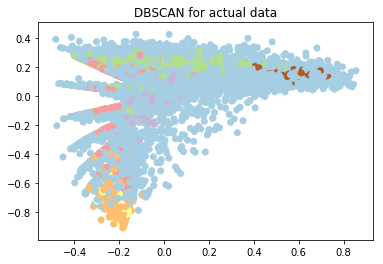

In [15]:
plt.scatter(X_normalized.iloc[:,0], X_normalized.iloc[:,1],c=y_pred1, cmap='Paired')
plt.title("DBSCAN for actual data")

Text(0.5,1,'DBSCAN for reduced data')

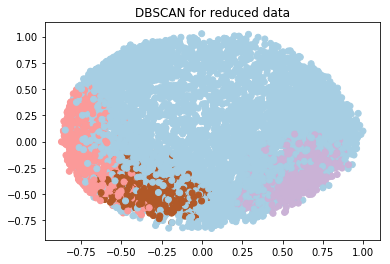

In [16]:
plt.scatter(X_principal.iloc[:,0], X_principal.iloc[:,1],c=y_pred2, cmap='Paired')
plt.title("DBSCAN for reduced data")